In [1]:
import os
import pandas as pd
from tqdm.auto import tqdm
from collections import defaultdict
from multiprocessing import Pool

from sklearn.model_selection import (
    train_test_split, cross_validate, cross_val_predict
)
from sklearn.metrics import mean_absolute_percentage_error
import lightgbm

In [2]:
REGENERATE_FEATURES = False
N_CV_FOLDS = 5

y_train = pd.read_csv("data/y_train.csv")

In [3]:
base_path_effnet = "embeddings/images_embedding_train_effnet/"
output_path_effnet = "embeddings/embedding_features_train_effnet.csv"

if REGENERATE_FEATURES:
    with Pool(8) as p:
        out = list(tqdm(p.imap(pd.read_csv, 
                               [f"{base_path_effnet}{p}" for p in os.listdir(base_path_effnet)])))

    embeddings = dict(zip([int(p.replace(".csv", "")) for p in os.listdir(base_path_effnet)], out))

    df_embeddings = pd.concat(embeddings).drop("Unnamed: 0", axis=1).astype(float)
    df_embeddings.index.name = ("id_annonce", "photo_id")
    df_embeddings = df_embeddings.unstack().mean(axis=1, level=0)

    df_features = (pd.merge(df_embeddings, y_train, left_index=True, right_on="id_annonce")
                   .set_index("id_annonce")
                   .fillna(0))

    df_features.to_csv(output_path_effnet)
else:
    df_features = pd.read_csv(output_path_effnet)

In [4]:
base_path_resnet = "embeddings/images_embedding_train_resnet/"
output_path_resnet = "embeddings/embedding_features_train_resnet.csv"

if REGENERATE_FEATURES:
    with Pool(8) as p:
        out = list(tqdm(p.imap(pd.read_csv, 
                               [f"{base_path_resnet}{p}" for p in os.listdir(base_path_resnet)])))

    embeddings = dict(zip([int(p.replace(".csv", "")) for p in os.listdir(base_path_resnet)], out))

    df_embeddings = pd.concat(embeddings).drop("Unnamed: 0", axis=1).astype(float)
    df_embeddings.index.name = ("id_annonce", "photo_id")
    df_embeddings = df_embeddings.unstack().mean(axis=1, level=0)

    df_features = (pd.merge(df_embeddings, y_train, left_index=True, right_on="id_annonce")
                   .set_index("id_annonce")
                   .fillna(0))

    df_features.to_csv(output_path_resnet)
else:
    df_features = pd.read_csv(output_path_resnet)

In [12]:
base_path_inception = "embeddings/images_embedding_train_inception/"
output_path_inception = "embeddings/embedding_features_train_inception.csv"

if REGENERATE_FEATURES:
    with Pool(8) as p:
        out = list(tqdm(p.imap(pd.read_csv, 
                               [f"{base_path_inception}{p}" for p in os.listdir(base_path_inception)])))

    embeddings = dict(zip([int(p.replace(".csv", "")) for p in os.listdir(base_path_inception)], out))

    df_embeddings = pd.concat(embeddings).drop("Unnamed: 0", axis=1).astype(float)
    df_embeddings.index.name = ("id_annonce", "photo_id")
    df_embeddings = df_embeddings.unstack().mean(axis=1, level=0)

    df_features = (pd.merge(df_embeddings, y_train, left_index=True, right_on="id_annonce")
                   .set_index("id_annonce")
                   .fillna(0))

    df_features.to_csv(output_path_inception)
else:
    df_features = pd.read_csv(output_path_inception)

<ipython-input-12-5e47cfd3c87c>:13: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  df_embeddings = df_embeddings.unstack().mean(axis=1, level=0)


In [13]:
df_features_effnet = pd.read_csv(output_path_effnet)
df_features_resnet = pd.read_csv(output_path_resnet)
df_features_inception = pd.read_csv(output_path_inception)

In [14]:
df_features = pd.merge(df_features_effnet, 
                       df_features_resnet.drop("price", axis=1), 
                       on="id_annonce", 
                       suffixes=("_eff", "_res"), 
                       #how="left",
                      )
df_features = pd.merge(df_features, 
                       df_features_inception.drop("price", axis=1), 
                       on="id_annonce", 
                       suffixes=("_", "_inc"), 
                       #how="left",
                      )

In [15]:
df_features.shape

(36999, 5378)

In [16]:
df_features.head()

,id_annonce,0_eff,1_eff,2_eff,3_eff,4_eff,5_eff,6_eff,7_eff,8_eff,...,2038_inc,2039_inc,2040_inc,2041_inc,2042_inc,2043_inc,2044_inc,2045_inc,2046_inc,2047_inc
0,35848595,0.044753,-0.060206,-0.076750,0.077579,-0.112735,-0.050762,0.653529,-0.101675,0.557251,...,1.277348,0.267398,0.290878,0.223630,0.156579,0.381072,0.291143,0.255713,0.198796,0.498620
1,35821523,0.166123,-0.014369,-0.006050,-0.093259,-0.065293,-0.077664,0.037013,-0.043974,0.253606,...,0.934350,0.551165,0.138185,0.565305,0.334704,0.279042,0.315783,0.176386,0.130153,0.628115
2,35771731,0.124427,-0.024026,-0.037894,-0.022422,-0.050379,-0.074865,0.262605,0.163225,0.342785,...,0.608943,0.916368,0.320022,0.402940,0.321665,0.443804,0.226860,0.027867,0.327307,0.747474
3,35849853,0.122147,0.029800,-0.008244,-0.077227,-0.055698,-0.095991,0.211937,-0.059971,0.492809,...,0.669813,0.121025,0.299451,0.307263,0.174477,0.289091,0.053446,0.259521,0.111999,0.704328
4,35739749,0.110253,-0.030288,-0.100294,-0.079469,-0.046362,-0.071412,0.249795,0.149802,0.369000,...,0.985597,0.728895,0.138939,0.491109,0.190189,0.301255,0.103673,0.410646,0.196775,0.741739


# XGB

In [35]:
%%time

xgb = lightgbm.LGBMRegressor(
    objective="mape",
    random_state=42,
    n_estimators=500,
    learning_rate=0.05,
    colsample_bytree=0.3,
    num_leaves=256,
    min_child_samples=5,
    max_depth=5,
    subsample=0.5,
    reg_alpha=0.001,
)

cross_val_pred = cross_val_predict(xgb, df_features.drop(
    ["price", "id_annonce"], axis=1
), df_features["price"], n_jobs=-1, verbose=3, cv=N_CV_FOLDS)

print(f"Mean score over folds = {mean_absolute_percentage_error(df_features.price, cross_val_pred):.1%}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.9min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished


Mean score over folds = 46.0%
CPU times: user 2.38 s, sys: 6.17 s, total: 8.55 s
Wall time: 4min 12s


In [27]:
SHOW_TRAIN = True

if SHOW_TRAIN:
    results = cross_validate(
        xgb,
        df_features.drop(
        ["price", "id_annonce"], axis=1),
        df_features["price"],
        cv=N_CV_FOLDS,
        scoring="neg_mean_absolute_percentage_error",
        return_estimator=True,
        return_train_score=True,
        verbose=3,
        n_jobs=-1,
    )

    print(f"Mean over val set = {-results['test_score'].mean():.1%}")
    print(f"Mean over train set = {-results['train_score'].mean():.1%}\n")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.1min remaining:  9.2min


Mean over val set = 45.8%
Mean over train set = 39.5%



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.1min finished


In [34]:
# format predictions on train to be a feature in LGBM
y_pred = (pd.Series(cross_val_pred, index=df_features["id_annonce"])
          .to_frame(name="price")
          .reset_index()
          .rename(columns={"index": "id_annonce"})
          )

df_pred = pd.merge(y_pred,
                   y_train,
                   on=["id_annonce"],
                   suffixes=("_pred", "_true")
                   )

df_pred.to_csv("images_features_effnet_resnet_inception_train.csv", index=False)

In [29]:
test_output_path_effnet = "embeddings/embedding_features_test_effnet.csv"
test_output_path_resnet = "embeddings/embedding_features_test_resnet.csv"
test_output_path_inception = "embeddings/embedding_features_test_inception.csv"

df_features_effnet = pd.read_csv(test_output_path_effnet).rename(columns={"Unnamed: 0": "id_annonce"})
df_features_resnet = pd.read_csv(test_output_path_resnet).rename(columns={"Unnamed: 0": "id_annonce"})
df_features_inception = pd.read_csv(test_output_path_inception).rename(columns={"Unnamed: 0": "id_annonce"})

df_features_test = pd.merge(df_features_effnet, 
                            df_features_resnet, 
                            on="id_annonce", 
                            suffixes=("_eff", "_res"))
df_features_test = pd.merge(df_features_test, 
                            df_features_inception, 
                            on="id_annonce", 
                            suffixes=("_", "_inc"))

In [30]:
df_features_test.head()

,id_annonce,0_eff,1_eff,2_eff,3_eff,4_eff,5_eff,6_eff,7_eff,8_eff,...,2038_inc,2039_inc,2040_inc,2041_inc,2042_inc,2043_inc,2044_inc,2045_inc,2046_inc,2047_inc
0,36040595,0.094981,0.025446,0.190530,-0.034122,0.167711,-0.063894,0.468022,-0.123071,0.389134,...,0.851388,0.219723,0.175442,0.366930,0.278301,0.356696,0.485130,0.406908,0.176479,0.438325
1,35778073,-0.007120,-0.115897,-0.041268,-0.109361,-0.058672,-0.058687,0.158419,-0.142142,0.374448,...,0.732082,0.591424,0.195635,0.416969,0.335884,0.236872,0.221198,0.544361,0.233033,0.625087
2,35865361,0.207126,-0.107844,-0.071392,-0.095317,0.018586,-0.105895,0.057709,-0.005658,0.270937,...,0.464128,0.366612,0.209458,0.276889,0.289013,0.089920,0.088165,0.232006,0.369213,0.689864
3,35928513,0.093858,0.095826,0.017788,-0.007112,-0.014322,0.119626,0.108527,0.243567,0.246621,...,0.857423,0.749237,0.162209,0.665679,0.110511,0.454608,0.398537,0.102929,0.173808,0.606883
4,36044095,-0.076173,-0.024195,-0.005058,-0.128680,0.042828,-0.111010,0.226875,0.274703,0.080662,...,0.962301,0.463838,0.117000,0.545678,0.136903,0.203130,0.173870,0.129991,0.354928,0.174302


In [31]:
predictions = list()
for estimator in results["estimator"]:
    raw_pred = estimator.predict(df_features_test.drop(["id_annonce"], axis=1))
    pred = pd.Series(raw_pred, index=df_features_test["id_annonce"])
    predictions.append(pred)

predictions = pd.concat(predictions, axis=1)
avg_predictions = predictions.median(axis=1).astype(int).reset_index(name="price_pred")

avg_predictions.to_csv(f"images_features_effnet_resnet_inception_test.csv", index=False)

<AxesSubplot:xlabel='price_pred'>

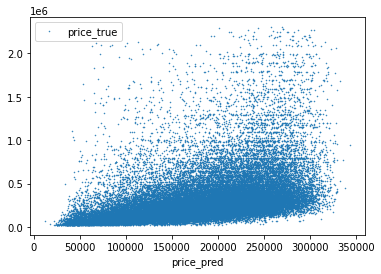

In [32]:
df_pred.plot(x='price_pred', y='price_true', style='.', markersize=1)